<a href="https://colab.research.google.com/github/kssubhodh/CS156_project/blob/main/CS_156.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1) Importing libraries and Loading data**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Function to load and label data
def load_and_label_data(folder_path, subject, exercise, sensor):
    data = []

    # Load template session data
    template_session_path = os.path.join(folder_path, f"s{subject}", f"e{exercise}", f"u{sensor}", "template_session.txt")
    template_times_path = os.path.join(folder_path, f"s{subject}", f"e{exercise}", "template_times.txt")

    template_session = pd.read_csv(template_session_path, sep=';', header=0)
    template_times = pd.read_csv(template_times_path, sep=';', header=0)



    # Update the execution type column name based on actual column name
    execution_type_col = 'execution type'  # Correct column name based on the printed output

    # Add time column
    template_session['times'] = (template_session.index) / 25.0

    # Label data according to template times
    for i, row in template_times.iterrows():
        start, end = int(row['start']), int(row['end'])
        label = row[execution_type_col]
        segment = template_session.iloc[start:end+1].copy()  # Make a copy of the slice to avoid SettingWithCopyWarning
        segment['label'] = label
        data.append(segment)

    return pd.concat(data)



# Load data for all subjects, exercises, and sensors
all_data = []
folder_path = '/content/drive/MyDrive/Dataset2/archive-2'  # Change this to your actual path
for subject in range(1, 6):
    for exercise in range(1, 9):
        for sensor in range(1, 6):
            data = load_and_label_data(folder_path, subject, exercise, sensor)
            all_data.append(data)

all_data = pd.concat(all_data)

# Map numerical labels to execution type names
mapping = {1: 'fast', 2: 'correct', 3: 'low-amplitude'}
all_data['label'] = all_data['label'].map(mapping)
print(all_data.head())
print(all_data.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     time index     acc_x     acc_y     acc_z     gyr_x     gyr_y     gyr_z  \
313         314 -9.675384 -1.665096  0.473116 -0.016972  0.022434  0.003591   
314         315 -9.660426 -1.687629  0.488249 -0.007946 -0.000952 -0.002020   
315         316 -9.660451 -1.702569  0.488208 -0.004190 -0.001160 -0.012884   
316         317 -9.660356 -1.657827  0.510743 -0.004123  0.006832 -0.016450   
317         318 -9.645445 -1.687700  0.488502 -0.004284  0.007983 -0.003784   

        mag_x     mag_y     mag_z  times label  
313  0.588639  0.457257 -0.081429  12.52  fast  
314  0.587563  0.457905 -0.081475  12.56  fast  
315  0.588892  0.457524 -0.081558  12.60  fast  
316  0.587898  0.457243 -0.080656  12.64  fast  
317  0.588329  0.457522 -0.081974  12.68  fast  
(68075, 12)


# **2) Data Visualization**

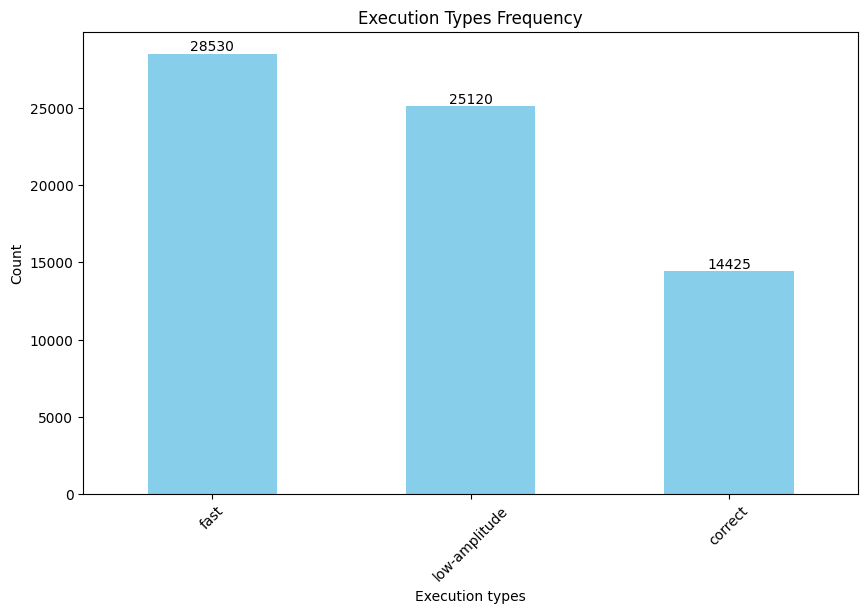

In [ ]:
value_counts = all_data['label'].value_counts()  #count of each execution type - fast,correct,

# Step 4: Plot the bar chart
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Execution Types Frequency')
plt.xlabel('Execution types')
plt.ylabel('Count')
plt.xticks(rotation=45)
for i, count in enumerate(value_counts):
    plt.text(i, count + 0.05, str(count), ha='center', va='bottom')

plt.show()
plt.show()

In [ ]:
print(all_data['label'].count())

68075


In [ ]:
#calculating average time for each execution type
avg_time_exe = all_data.groupby('label')['times'].mean()
print(avg_time_exe)

label
correct          29.191667
fast             11.145110
low-amplitude    45.245963
Name: times, dtype: float64


     time index     acc_x     acc_y     acc_z     gyr_x     gyr_y     gyr_z  \
313         314 -9.675384 -1.665096  0.473116 -0.016972  0.022434  0.003591   
314         315 -9.660426 -1.687629  0.488249 -0.007946 -0.000952 -0.002020   
315         316 -9.660451 -1.702569  0.488208 -0.004190 -0.001160 -0.012884   
316         317 -9.660356 -1.657827  0.510743 -0.004123  0.006832 -0.016450   
317         318 -9.645445 -1.687700  0.488502 -0.004284  0.007983 -0.003784   

        mag_x     mag_y     mag_z  times  label  
313  0.588639  0.457257 -0.081429  12.52    1.0  
314  0.587563  0.457905 -0.081475  12.56    1.0  
315  0.588892  0.457524 -0.081558  12.60    1.0  
316  0.587898  0.457243 -0.080656  12.64    1.0  
317  0.588329  0.457522 -0.081974  12.68    1.0  


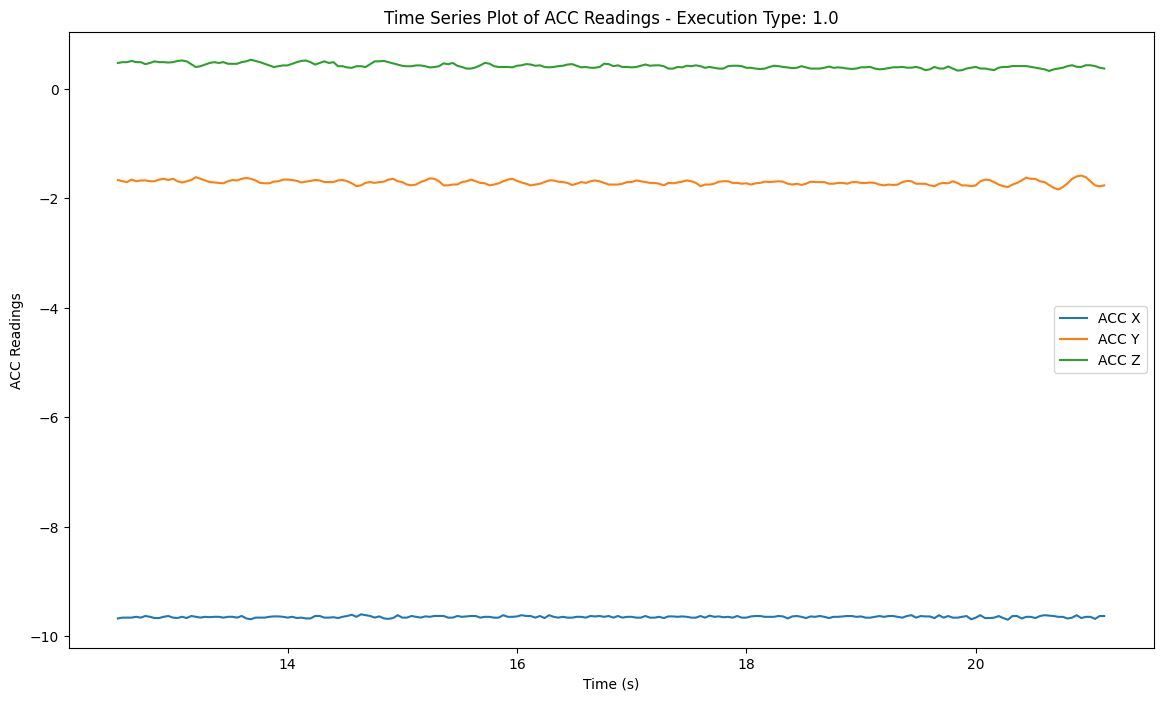

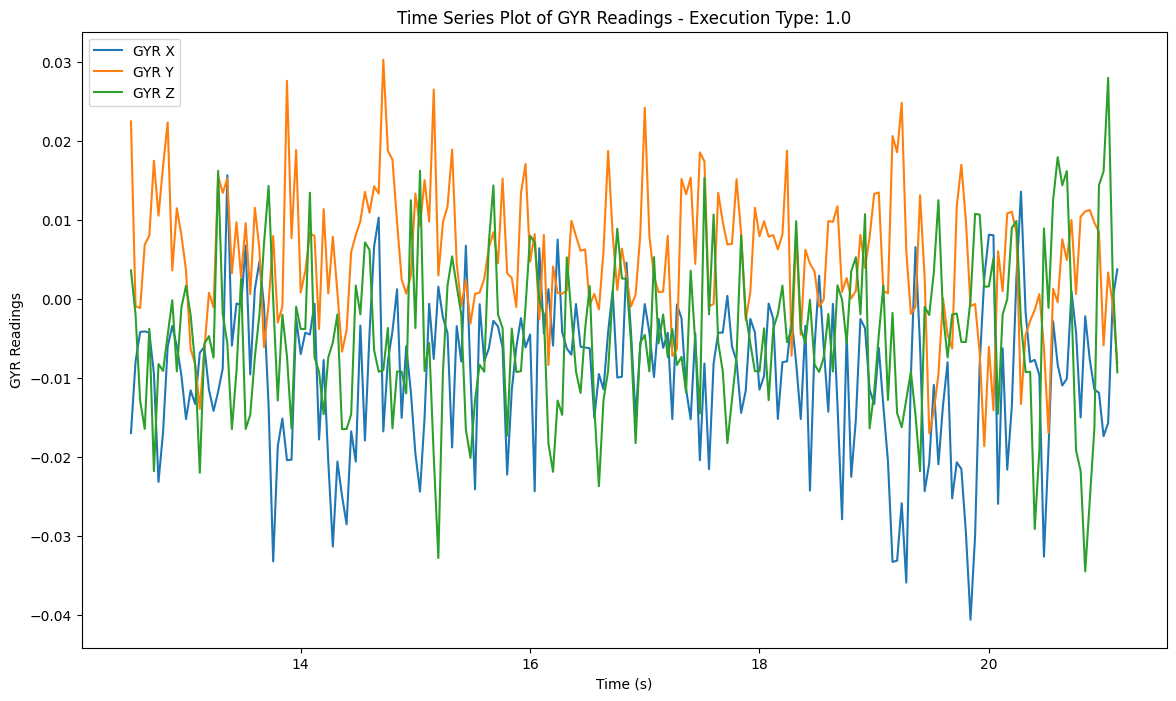

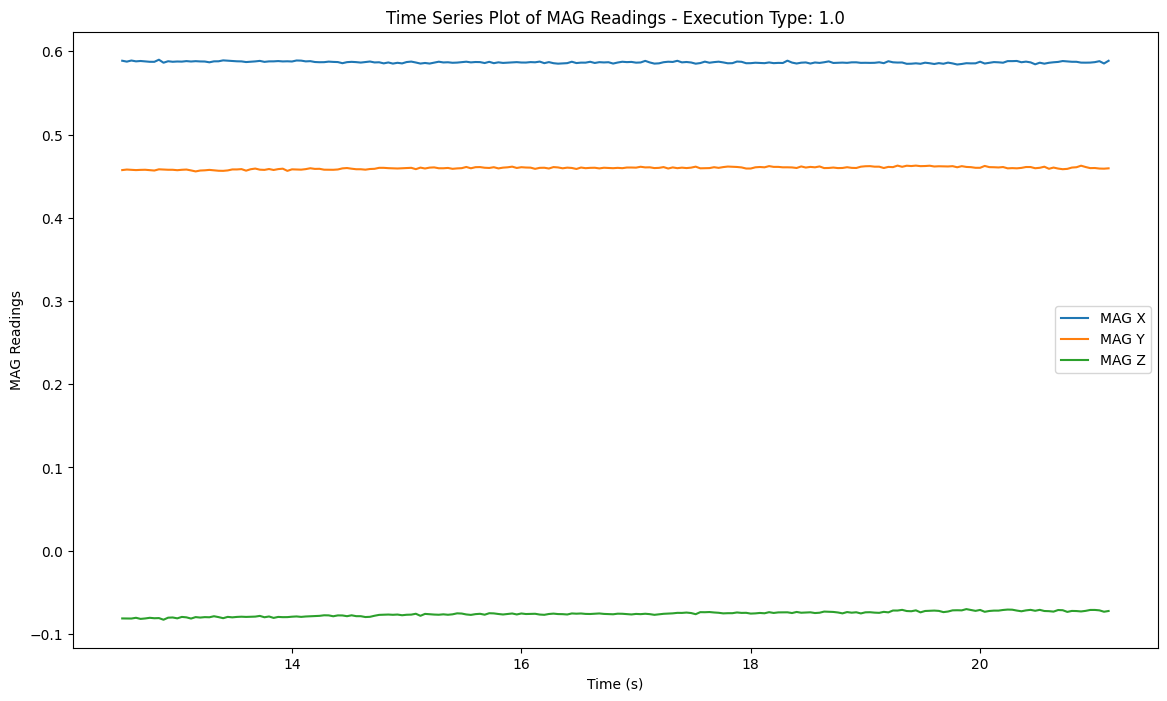

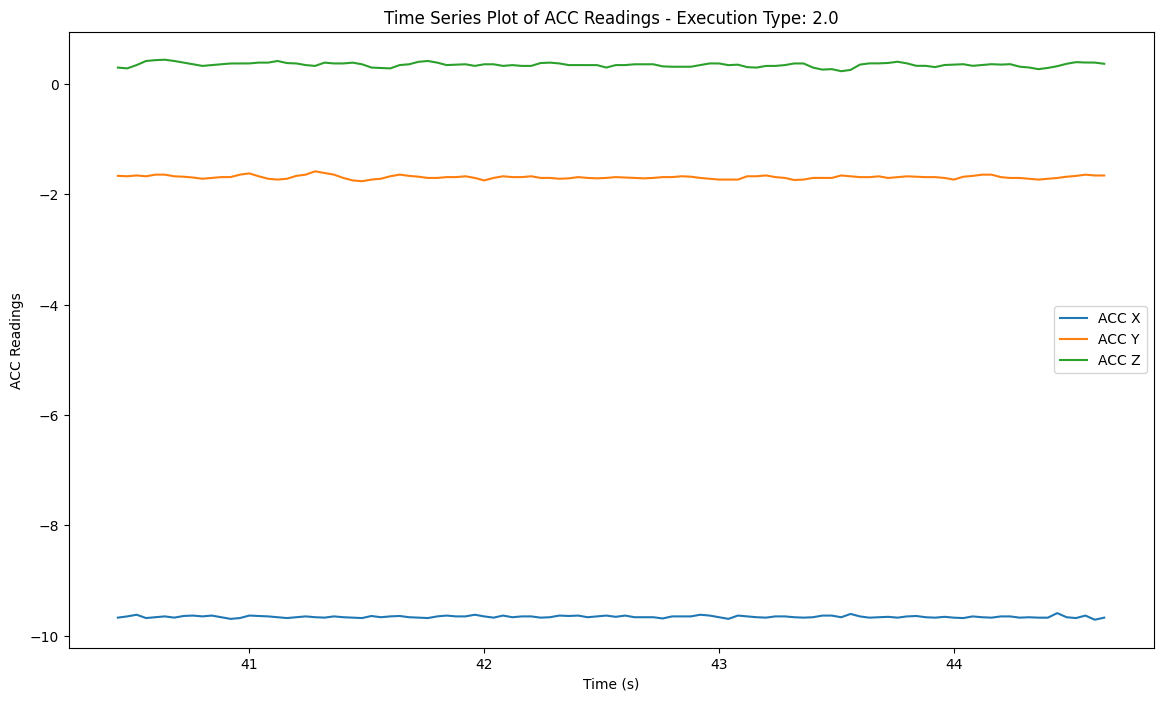

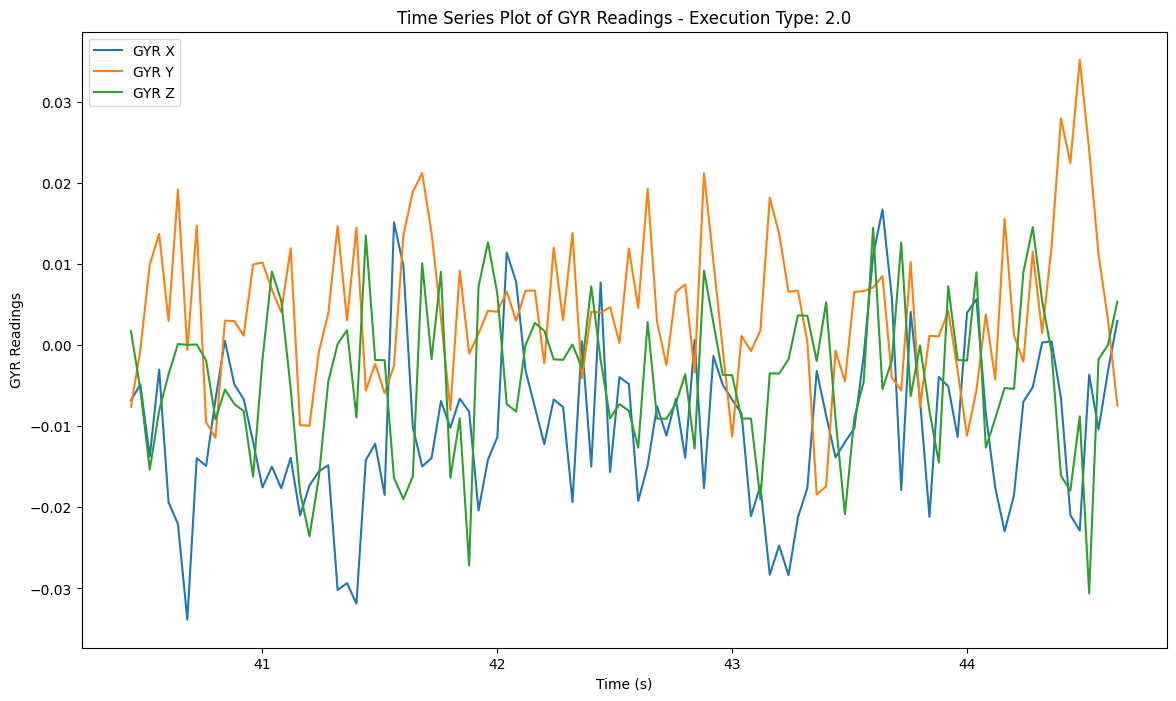

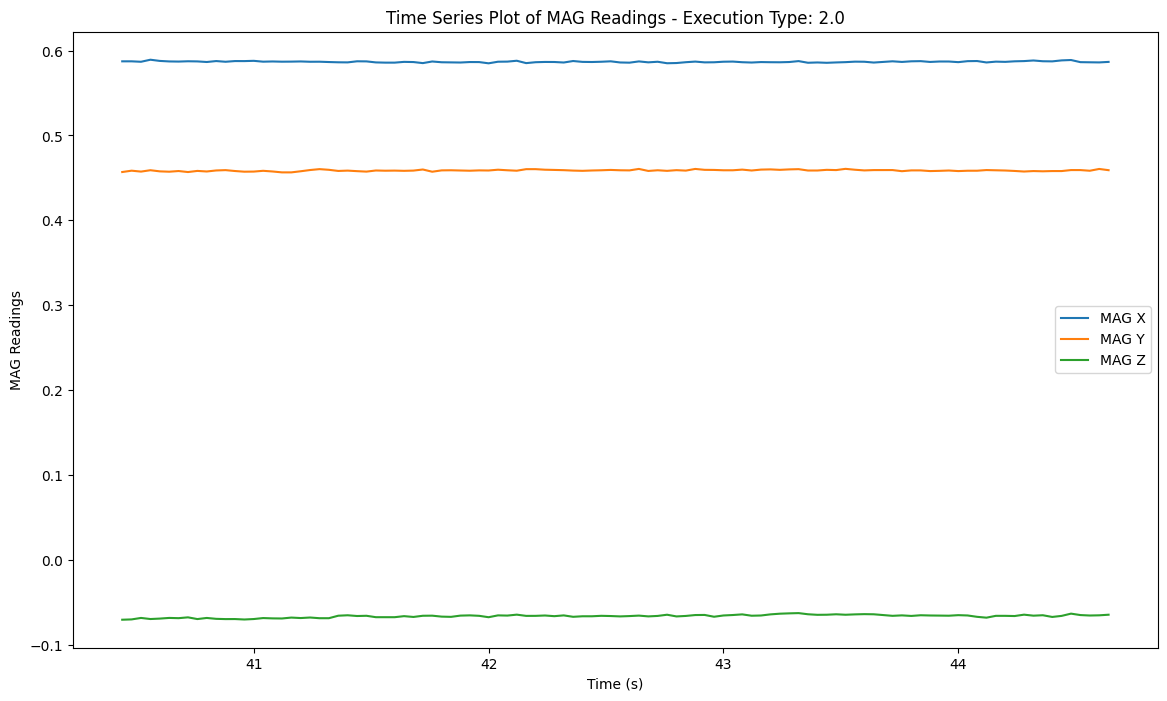

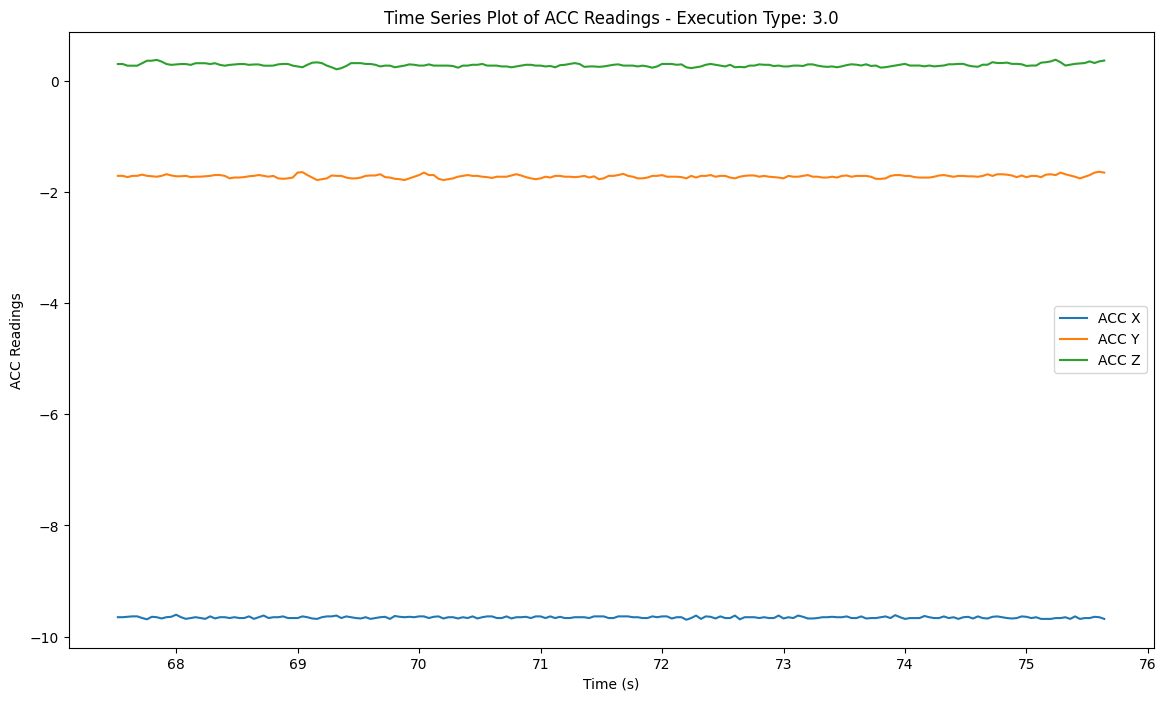

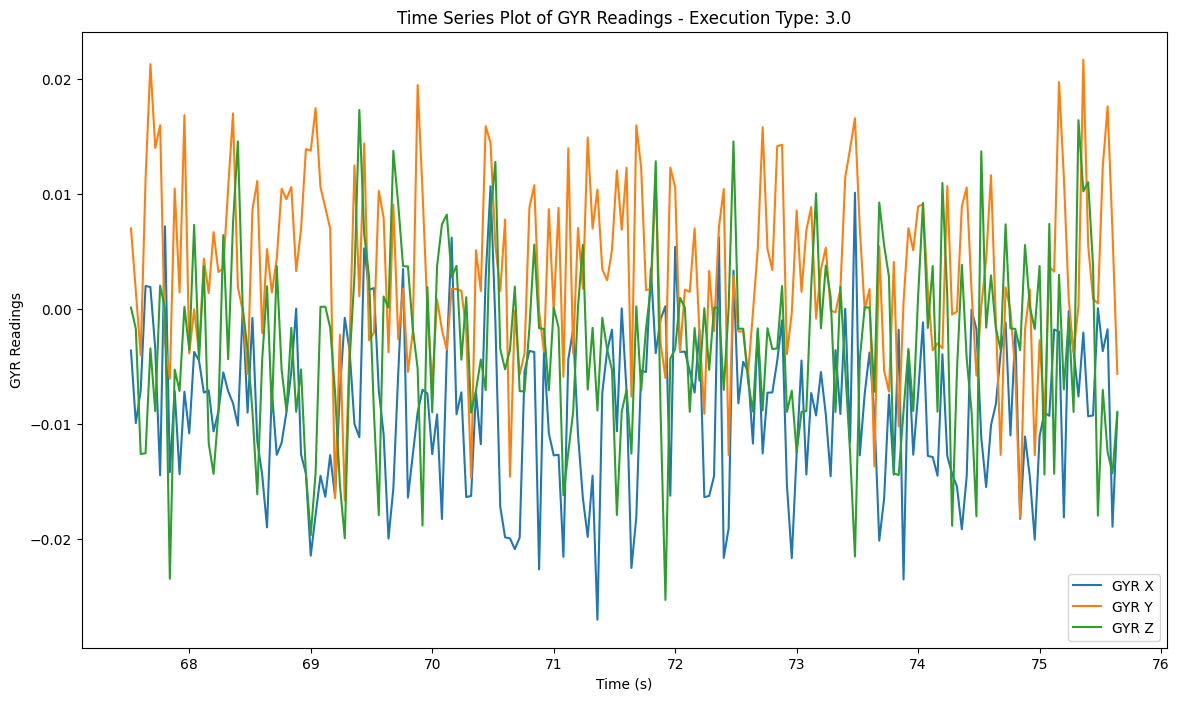

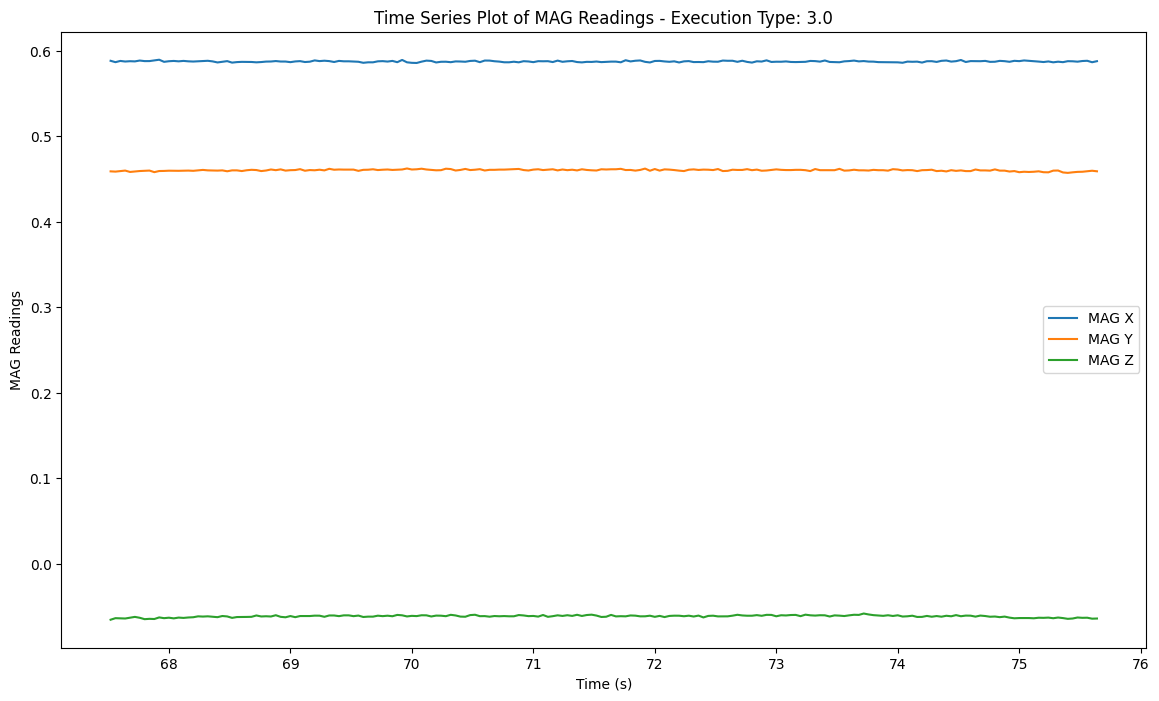

In [ ]:
#time series plots
subject = 1
exercise = 1
sensor = 1
data = load_and_label_data(folder_path, subject, exercise, sensor)
print(data.head())


# Time Series Plot for specific execution type
def plot_time_series(data, sensor_type, execution_type):
    execution_data = data[data['label'] == execution_type]
    plt.figure(figsize=(14, 8))
    plt.plot(execution_data['times'], execution_data[f'{sensor_type}_x'], label=f'{sensor_type.upper()} X')
    plt.plot(execution_data['times'], execution_data[f'{sensor_type}_y'], label=f'{sensor_type.upper()} Y')
    plt.plot(execution_data['times'], execution_data[f'{sensor_type}_z'], label=f'{sensor_type.upper()} Z')
    plt.xlabel('Time (s)')
    plt.ylabel(f'{sensor_type.upper()} Readings')
    plt.title(f'Time Series Plot of {sensor_type.upper()} Readings - Execution Type: {execution_type}')
    plt.legend()
    plt.show()

# Example usage for time series plots for each execution type
execution_types = data['label'].unique()
for execution_type in execution_types:
    plot_time_series(data, 'acc', execution_type)
    plot_time_series(data, 'gyr', execution_type)
    plot_time_series(data, 'mag', execution_type)

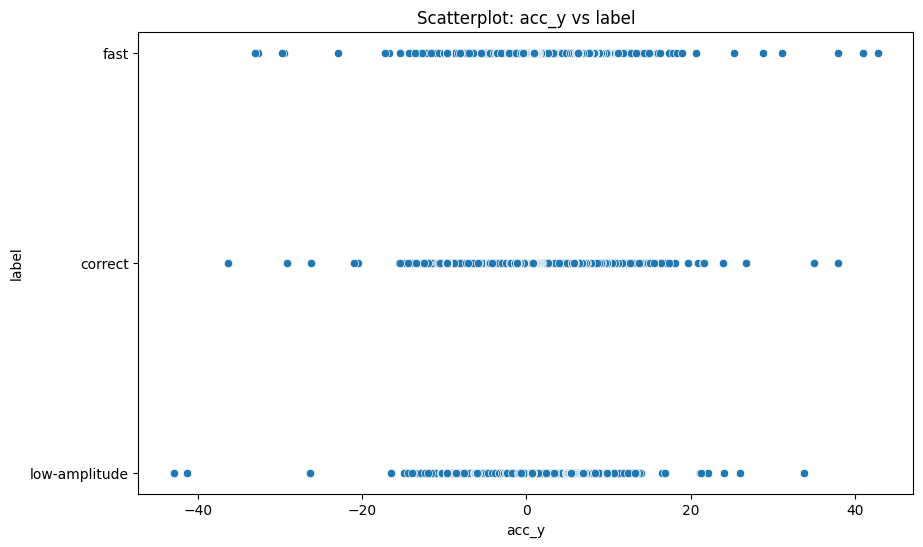

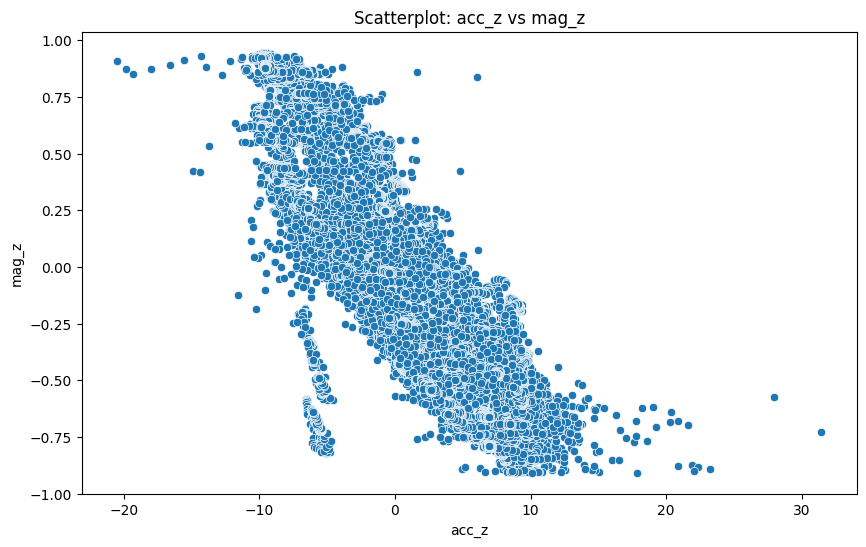

In [ ]:
# Scatterplot function
def plot_scatter(data, x_attr, y_attr):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=x_attr, y=y_attr)
    plt.xlabel(x_attr)
    plt.ylabel(y_attr)
    plt.title(f'Scatterplot: {x_attr} vs {y_attr}')
    plt.show()

# Example usage for scatter plots
plot_scatter(all_data, 'acc_y', 'label')
plot_scatter(all_data, 'acc_z', 'mag_z')

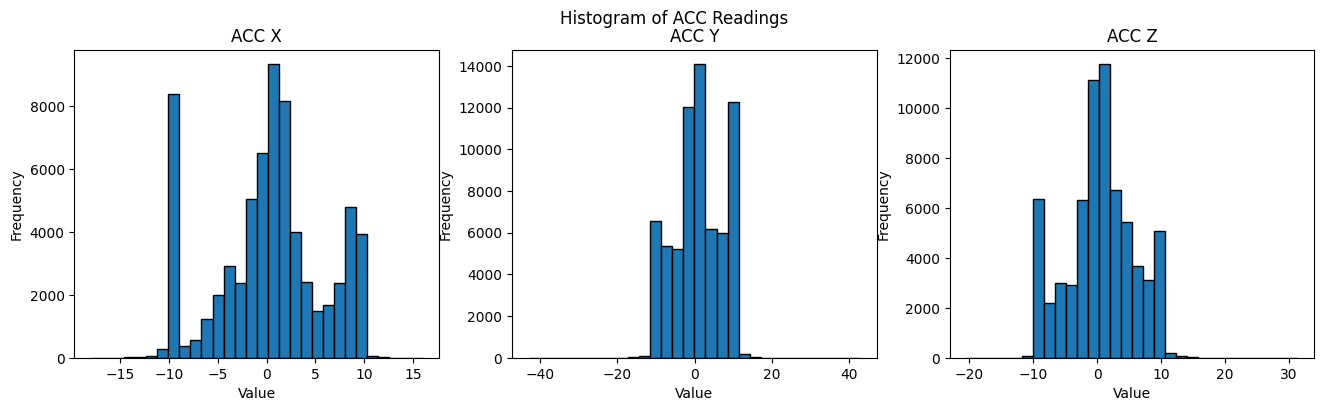

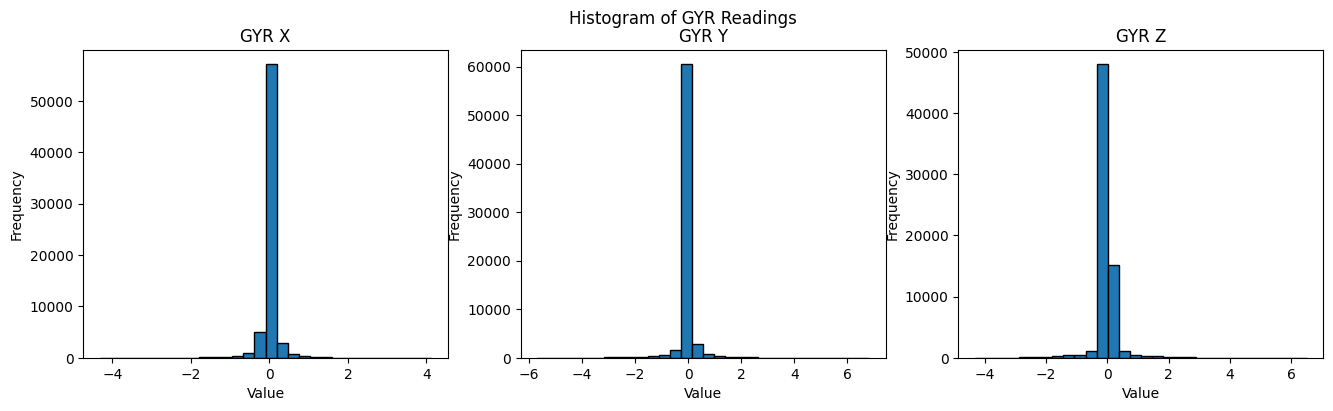

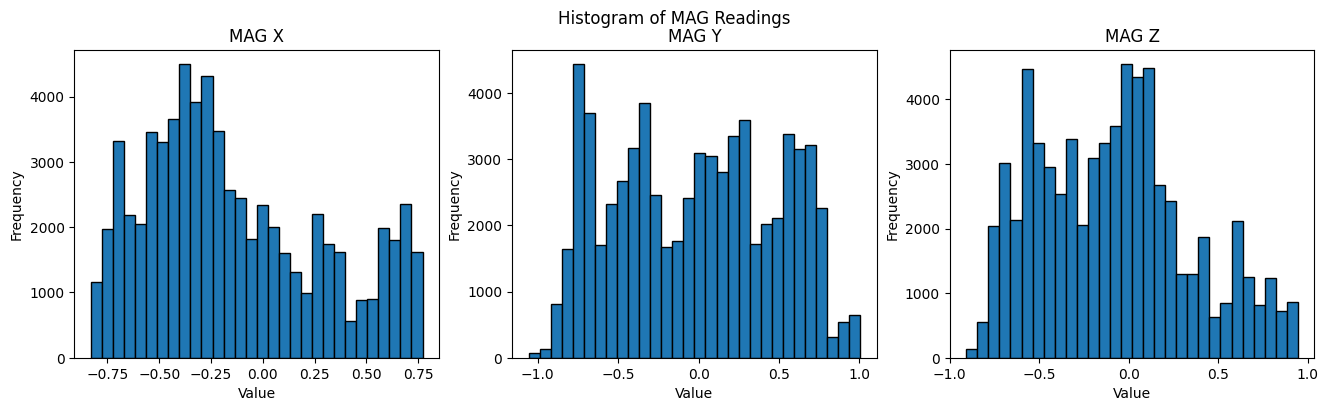

In [ ]:
# Histogram function
def plot_histograms(data):
    sensors = ['acc', 'gyr', 'mag']
    for sensor in sensors:
        plt.figure(figsize=(16, 4))
        plt.suptitle(f'Histogram of {sensor.upper()} Readings')
        for i, axis in enumerate(['x', 'y', 'z']):
            plt.subplot(1, 3, i+1)
            plt.hist(data[f'{sensor}_{axis}'], bins=30, edgecolor='k')
            plt.title(f'{sensor.upper()} {axis.upper()}')
            plt.xlabel('Value')
            plt.ylabel('Frequency')
        plt.show()

# Example usage for histograms
plot_histograms(all_data)

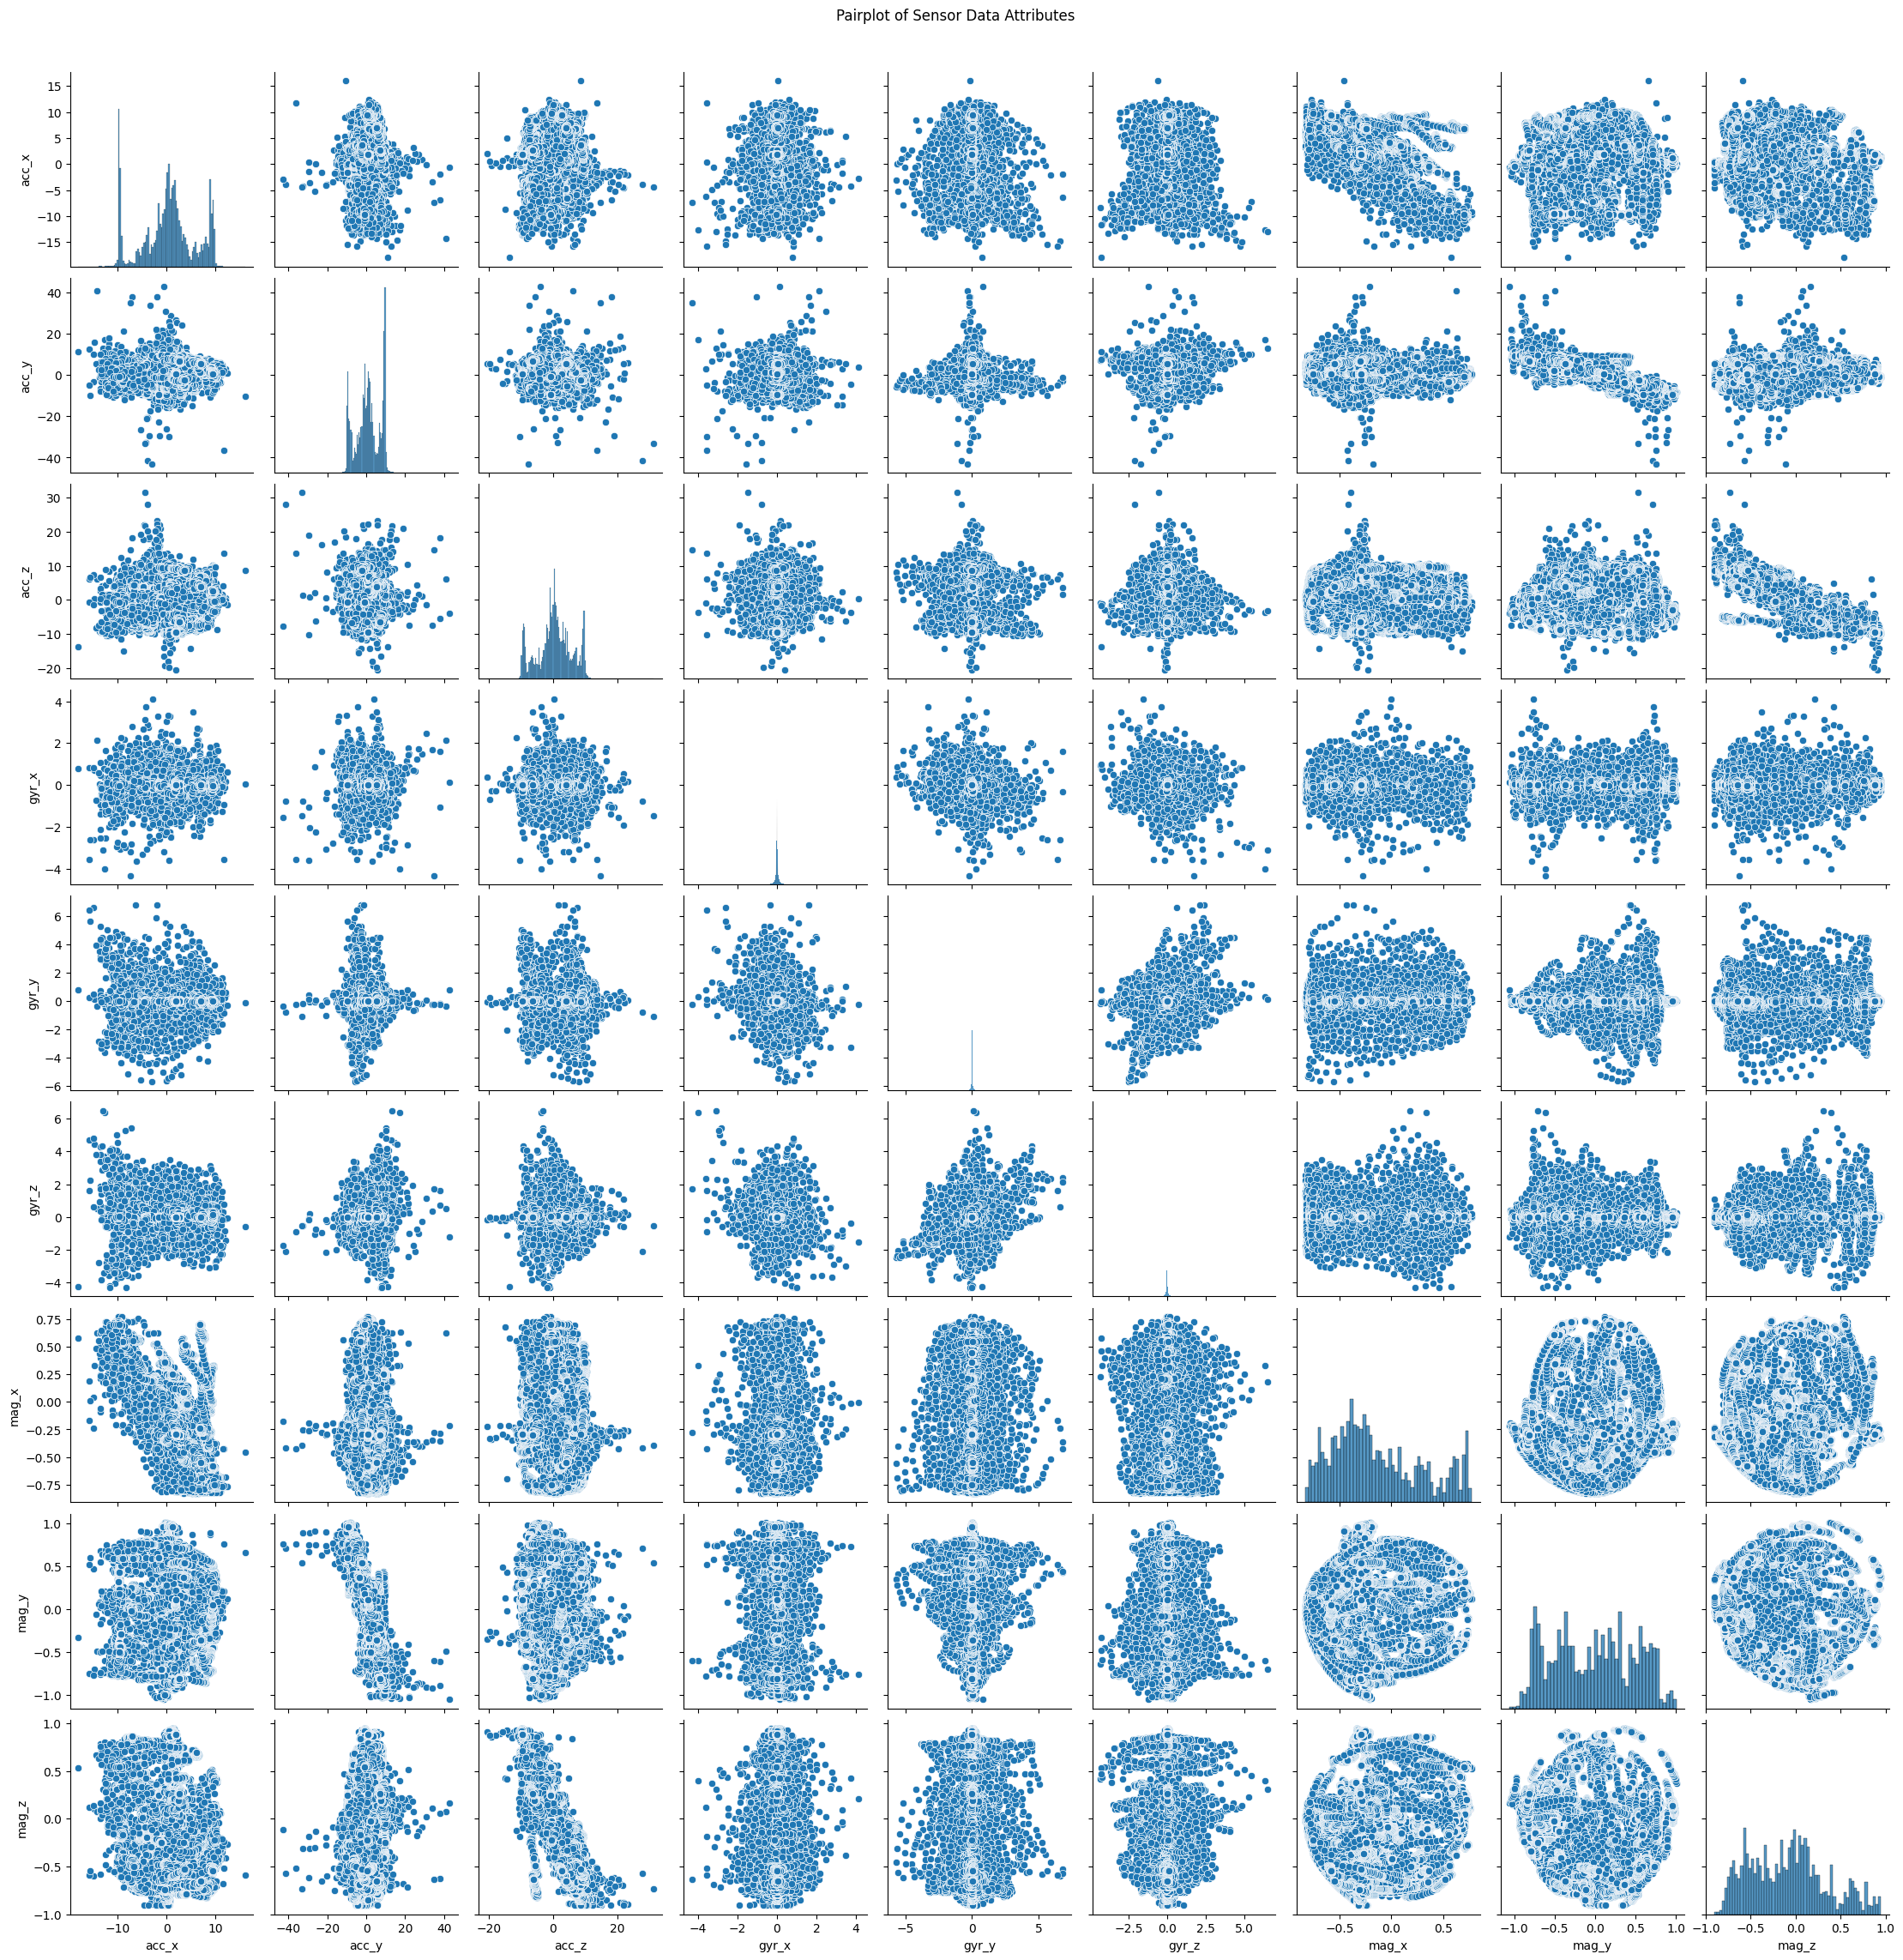

In [ ]:
# Pair-plot function
def plot_pairplot(data):
    subset = data[['acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z', 'mag_x', 'mag_y', 'mag_z']]
    sns.pairplot(subset)
    plt.suptitle('Pairplot of Sensor Data Attributes', y=1.02)
    plt.show()

# Example usage for pair plots
plot_pairplot(all_data)

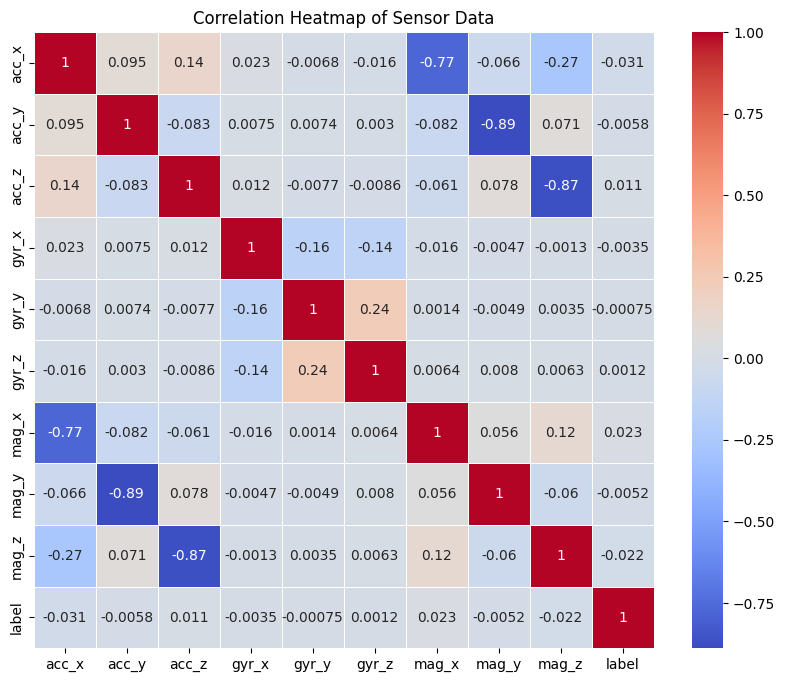

In [ ]:
# Correlation Heatmap function
def plot_correlation_heatmap(data):
    mapping = {'fast': 1 , 'correct': 2 , 'low-amplitude': 3}
    all_data['label'] = all_data['label'].map(mapping)
    subset = data[['acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z', 'mag_x', 'mag_y', 'mag_z','label']]
    correlation_matrix = subset.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap of Sensor Data')
    plt.show()


plot_correlation_heatmap(all_data) #all_data is the df with execution type column

In [ ]:
#!pip install scipy==1.11.1

In [ ]:
from scipy.signal import butter, filtfilt

In [ ]:
def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

In [ ]:
#  'fs' is sampling frequency (25 Hz)
fs = 25

# Adjust cutoff and order as needed
cutoff_acc = 5  # Cutoff frequency for accelerometer data
cutoff_gyr = 3  # Cutoff frequency for gyroscope data
cutoff_mag = 2  # Cutoff frequency for magnetometer data
order = 4  # Filter order

# Apply filter to all sensor readings
all_data['acc_x_filtered'] = butter_lowpass_filter(all_data['acc_x'], cutoff_acc, fs, order)
all_data['acc_y_filtered'] = butter_lowpass_filter(all_data['acc_y'], cutoff_acc, fs, order)
all_data['acc_z_filtered'] = butter_lowpass_filter(all_data['acc_z'], cutoff_acc, fs, order)

all_data['gyr_x_filtered'] = butter_lowpass_filter(all_data['gyr_x'], cutoff_gyr, fs, order)
all_data['gyr_y_filtered'] = butter_lowpass_filter(all_data['gyr_y'], cutoff_gyr, fs, order)
all_data['gyr_z_filtered'] = butter_lowpass_filter(all_data['gyr_z'], cutoff_gyr, fs, order)

all_data['mag_x_filtered'] = butter_lowpass_filter(all_data['mag_x'], cutoff_mag, fs, order)
all_data['mag_y_filtered'] = butter_lowpass_filter(all_data['mag_y'], cutoff_mag, fs, order)
all_data['mag_z_filtered'] = butter_lowpass_filter(all_data['mag_z'], cutoff_mag, fs, order)

In [ ]:
fs = 25  # Sampling frequency in Hz
all_data['time'] = all_data.index / fs


In [ ]:
def segment_data(data, window_size, overlap):
    """
    Segments data into fixed-size windows.

    Args:
        data: The time series data.
        window_size: The size of each window in seconds.
        overlap: The overlap between windows as a percentage (0 to 1).

    Returns:
        A list of data segments.
    """
    segments = []
    fs = 25 # Sampling frequency
    window_samples = int(window_size * fs)
    step_size = int(window_samples * (1 - overlap))

    for i in range(0, len(data) - window_samples + 1, step_size):
        segment = data.iloc[i: i + window_samples]
        segments.append(segment)

    return segments

# Example usage:
window_size = 25  # seconds
overlap = 0.5  # 50% overlap
segments = segment_data(all_data, window_size, overlap)

In [ ]:
print(all_data['time'].min())
print(all_data['time'].max())

0.36
75.64


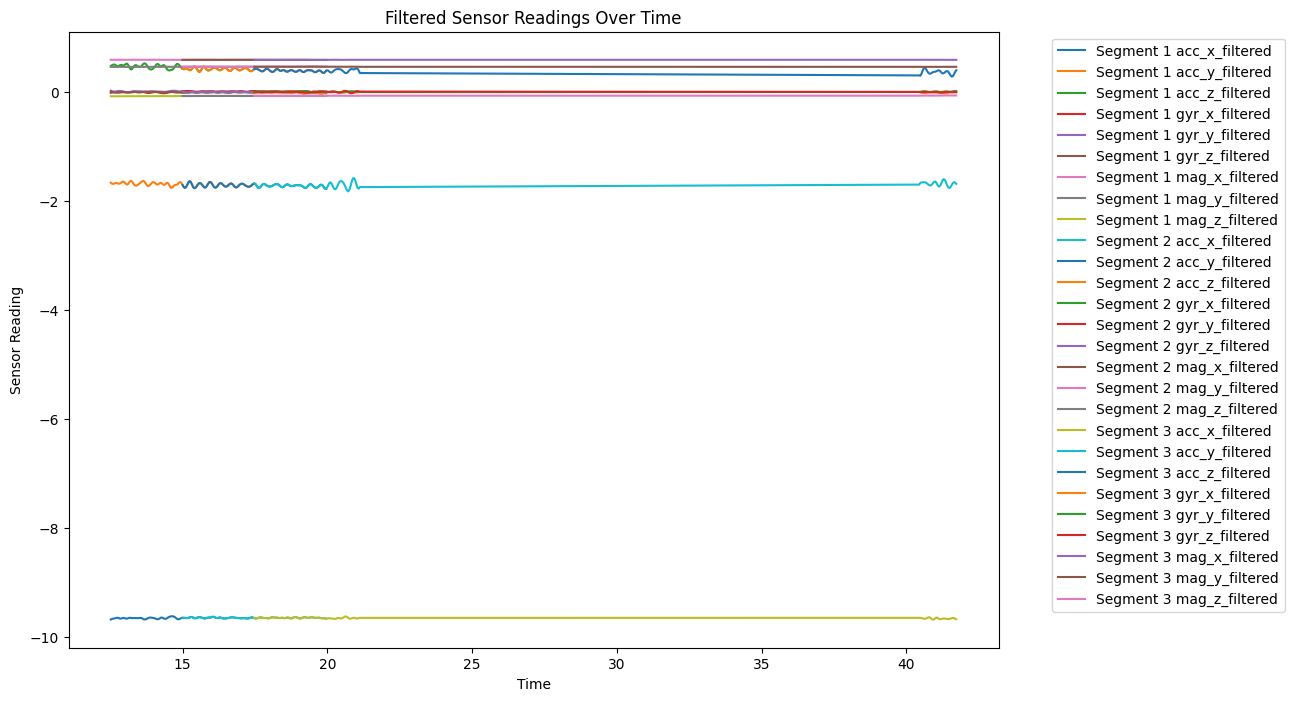

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure 'time' column exists in 'all_data'
fs = 25  # Sampling frequency in Hz
all_data['time'] = all_data.index / fs

# Define the segmentation function
def segment_data(data, window_size, overlap):
    segments = []
    fs = 25  # Sampling frequency
    window_samples = int(window_size * fs)
    step_size = int(window_samples * (1 - overlap))

    for i in range(0, len(data) - window_samples + 1, step_size):
        segment = data.iloc[i:i + window_samples]
        segments.append(segment)

    return segments

# Example usage
window_size = 5  # 5 seconds
overlap = 0.5    # 50% overlap
segments = segment_data(all_data, window_size, overlap)

# Plotting a subset of the filtered sensor readings over time
plt.figure(figsize=(12, 8))

# Plot only the first few segments to avoid excessive plot size
num_segments_to_plot = 3  # Adjust this number based on your data size and desired plot
for i, segment in enumerate(segments[:num_segments_to_plot]):
    plt.plot(segment['time'], segment['acc_x_filtered'], label=f'Segment {i+1} acc_x_filtered')
    plt.plot(segment['time'], segment['acc_y_filtered'], label=f'Segment {i+1} acc_y_filtered')
    plt.plot(segment['time'], segment['acc_z_filtered'], label=f'Segment {i+1} acc_z_filtered')
    plt.plot(segment['time'], segment['gyr_x_filtered'], label=f'Segment {i+1} gyr_x_filtered')
    plt.plot(segment['time'], segment['gyr_y_filtered'], label=f'Segment {i+1} gyr_y_filtered')
    plt.plot(segment['time'], segment['gyr_z_filtered'], label=f'Segment {i+1} gyr_z_filtered')
    plt.plot(segment['time'], segment['mag_x_filtered'], label=f'Segment {i+1} mag_x_filtered')
    plt.plot(segment['time'], segment['mag_y_filtered'], label=f'Segment {i+1} mag_y_filtered')
    plt.plot(segment['time'], segment['mag_z_filtered'], label=f'Segment {i+1} mag_z_filtered')

plt.xlabel('Time')
plt.ylabel('Sensor Reading')
plt.title('Filtered Sensor Readings Over Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


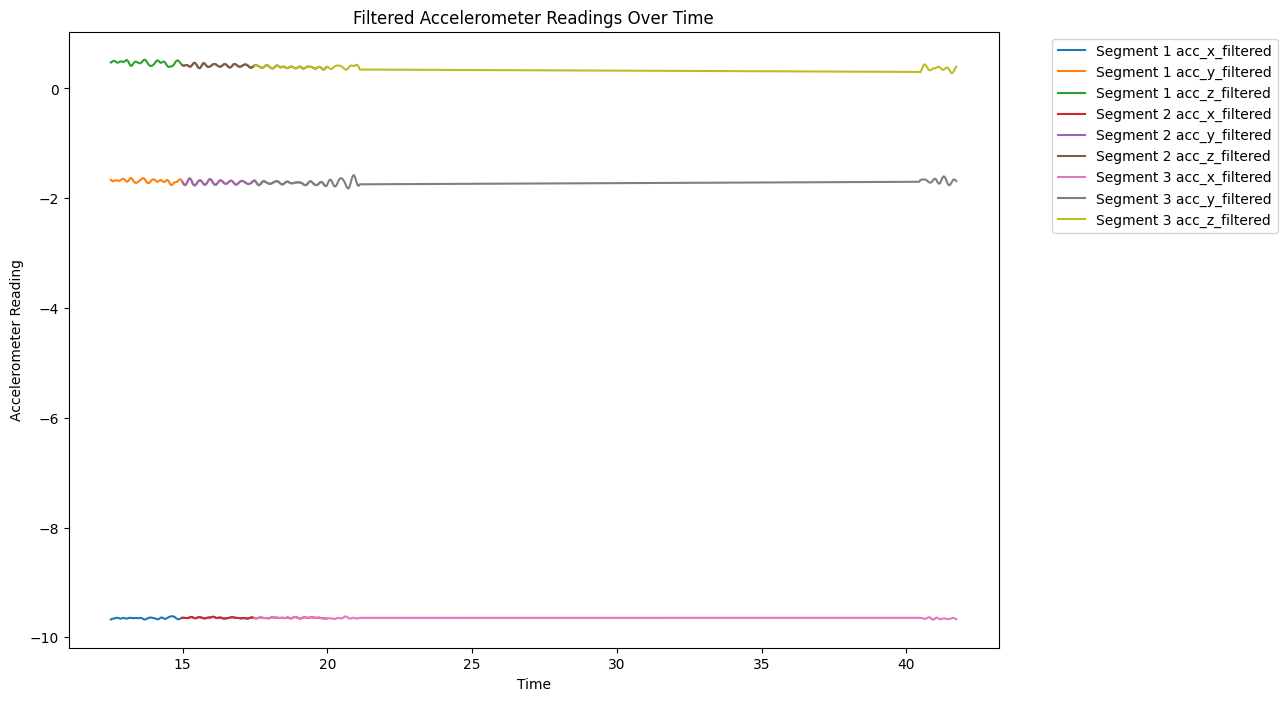

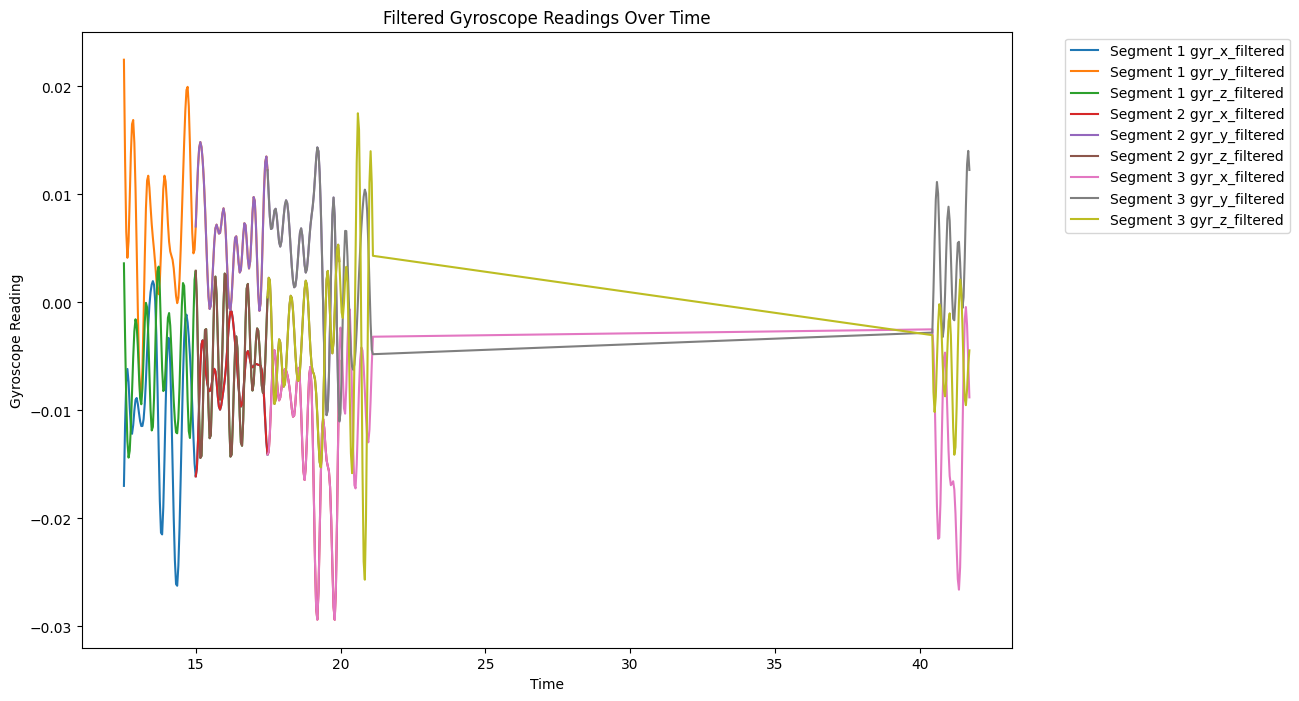

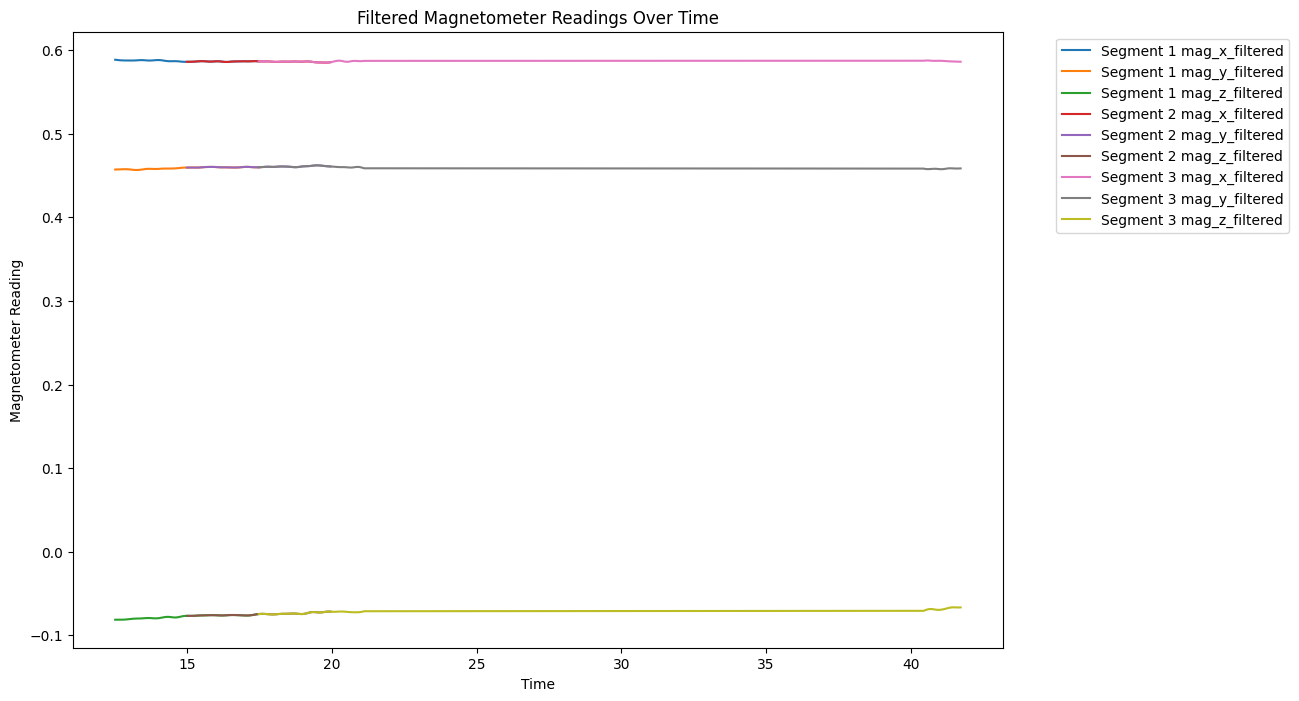

In [ ]:
import matplotlib.pyplot as plt

# Plotting the filtered sensor readings over time for accelerometer
plt.figure(figsize=(12, 8))
for i, segment in enumerate(segments[:num_segments_to_plot]):
    plt.plot(segment['time'], segment['acc_x_filtered'], label=f'Segment {i+1} acc_x_filtered')
    plt.plot(segment['time'], segment['acc_y_filtered'], label=f'Segment {i+1} acc_y_filtered')
    plt.plot(segment['time'], segment['acc_z_filtered'], label=f'Segment {i+1} acc_z_filtered')
plt.xlabel('Time')
plt.ylabel('Accelerometer Reading')
plt.title('Filtered Accelerometer Readings Over Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plotting the filtered sensor readings over time for gyroscope
plt.figure(figsize=(12, 8))
for i, segment in enumerate(segments[:num_segments_to_plot]):
    plt.plot(segment['time'], segment['gyr_x_filtered'], label=f'Segment {i+1} gyr_x_filtered')
    plt.plot(segment['time'], segment['gyr_y_filtered'], label=f'Segment {i+1} gyr_y_filtered')
    plt.plot(segment['time'], segment['gyr_z_filtered'], label=f'Segment {i+1} gyr_z_filtered')
plt.xlabel('Time')
plt.ylabel('Gyroscope Reading')
plt.title('Filtered Gyroscope Readings Over Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plotting the filtered sensor readings over time for magnetometer
plt.figure(figsize=(12, 8))
for i, segment in enumerate(segments[:num_segments_to_plot]):
    plt.plot(segment['time'], segment['mag_x_filtered'], label=f'Segment {i+1} mag_x_filtered')
    plt.plot(segment['time'], segment['mag_y_filtered'], label=f'Segment {i+1} mag_y_filtered')
    plt.plot(segment['time'], segment['mag_z_filtered'], label=f'Segment {i+1} mag_z_filtered')
plt.xlabel('Time')
plt.ylabel('Magnetometer Reading')
plt.title('Filtered Magnetometer Readings Over Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# **Feature Engineering**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# all_data is the DataFrame with features and labels
features_df = all_data.drop(columns=['label'])
labels = all_data['label']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_df)

# ANOVA F-test
selector_anova = SelectKBest(f_classif, k=5)
selector_anova.fit(X_scaled, labels)
selected_features_anova = features_df.columns[selector_anova.get_support()]

print("Top features selected by ANOVA F-test:")
print(selected_features_anova)
print("\n")

# Mutual Information
selector_mi = SelectKBest(mutual_info_classif, k=5)
selector_mi.fit(X_scaled, labels)
selected_features_mi = features_df.columns[selector_mi.get_support()]

print("Top features selected by Mutual Information:")
print(selected_features_mi)
print("\n")

# Recursive Feature Elimination (RFE) with Logistic Regression
model = LogisticRegression(solver='liblinear')
selector_rfe = RFE(model, n_features_to_select=5)
selector_rfe.fit(X_scaled, labels)
selected_features_rfe = features_df.columns[selector_rfe.get_support()]

print("Top features selected by RFE with Logistic Regression:")
print(selected_features_rfe)


Top features selected by ANOVA F-test:
Index(['time index', 'acc_x', 'times', 'acc_x_filtered', 'time'], dtype='object')


Top features selected by Mutual Information:
Index(['time index', 'acc_x', 'acc_y', 'times', 'time'], dtype='object')


Top features selected by RFE with Logistic Regression:
Index(['time index', 'mag_x', 'times', 'acc_x_filtered', 'time'], dtype='object')


# **Model Development**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report


features = ['time index', 'acc_x', 'mag_x','acc_y','times', 'acc_x_filtered', 'time']
X = all_data[features]
y = all_data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB()
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test)
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)
    results[model_name] = {
        'accuracy': accuracy,
        'classification_report': class_report
    }

# Print results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['accuracy']}")
    print("Classification Report:")
    print(pd.DataFrame(metrics['classification_report']).transpose())
    print("\n")


Model: Decision Tree
Accuracy: 0.9864120455380095
Classification Report:
              precision    recall  f1-score       support
1              0.991674  0.995993  0.993829   5740.000000
2              0.971193  0.965564  0.968371   2933.000000
3              0.989258  0.987657  0.988457   4942.000000
accuracy       0.986412  0.986412  0.986412      0.986412
macro avg      0.984042  0.983071  0.983552  13615.000000
weighted avg   0.986385  0.986412  0.986395  13615.000000


Model: K-Nearest Neighbors
Accuracy: 0.9163422695556371
Classification Report:
              precision    recall  f1-score       support
1              0.959854  0.962195  0.961023   5740.000000
2              0.812762  0.794749  0.803655   2933.000000
3              0.925696  0.935249  0.930448   4942.000000
accuracy       0.916342  0.916342  0.916342      0.916342
macro avg      0.899437  0.897398  0.898375  13615.000000
weighted avg   0.915768  0.916342  0.916024  13615.000000


Model: Support Vector Machine
Ac

# **Advanced Model Exploration**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, LSTM
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report


features = ['time index', 'acc_x', 'times', 'acc_x_filtered', 'time']
X = all_data[features]
y = all_data['label']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encode the labels
y_encoded = to_categorical(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Define a function to evaluate and print model performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)
    accuracy = accuracy_score(y_true, y_pred_classes)
    class_report = classification_report(y_true, y_pred_classes)
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(class_report)

# ANN
print("Artificial Neural Network (ANN)")
ann_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
ann_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)
evaluate_model(ann_model, X_test, y_test)

# Reshape the data for CNN and RNN
X_train_cnn_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# CNN
print("Convolutional Neural Network (CNN)")
cnn_model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    Conv1D(64, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_cnn_rnn, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)
evaluate_model(cnn_model, X_test_cnn_rnn, y_test)

# RNN
print("Recurrent Neural Network (RNN)")
rnn_model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
rnn_model.fit(X_train_cnn_rnn, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)
evaluate_model(rnn_model, X_test_cnn_rnn, y_test)


Artificial Neural Network (ANN)
Epoch 1/10
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8348 - loss: 0.4329 - val_accuracy: 0.8718 - val_loss: 0.2972
Epoch 2/10
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8722 - loss: 0.2929 - val_accuracy: 0.8762 - val_loss: 0.2841
Epoch 3/10
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8766 - loss: 0.2839 - val_accuracy: 0.8709 - val_loss: 0.2833
Epoch 4/10
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8757 - loss: 0.2774 - val_accuracy: 0.8726 - val_loss: 0.2828
Epoch 5/10
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8731 - loss: 0.2784 - val_accuracy: 0.8772 - val_loss: 0.2743
Epoch 6/10
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8741 - loss: 0.2762 - val_accuracy: 0.8749 - val_loss: 0.2728
Epoch 7/10
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8773 - loss: 0.2702 - val_accuracy: 0.8740 - val_loss: 0.2749
Epoch 8/10
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - a

# **Evaluation**

In [ ]:
print(all_data.head())

     time index     acc_x     acc_y     acc_z     gyr_x     gyr_y     gyr_z  \
313         314 -9.675384 -1.665096  0.473116 -0.016972  0.022434  0.003591   
314         315 -9.660426 -1.687629  0.488249 -0.007946 -0.000952 -0.002020   
315         316 -9.660451 -1.702569  0.488208 -0.004190 -0.001160 -0.012884   
316         317 -9.660356 -1.657827  0.510743 -0.004123  0.006832 -0.016450   
317         318 -9.645445 -1.687700  0.488502 -0.004284  0.007983 -0.003784   

        mag_x     mag_y     mag_z  ...  acc_x_filtered  acc_y_filtered  \
313  0.588639  0.457257 -0.081429  ...       -9.675362       -1.665071   
314  0.587563  0.457905 -0.081475  ...       -9.665947       -1.683768   
315  0.588892  0.457524 -0.081558  ...       -9.660250       -1.689383   
316  0.587898  0.457243 -0.080656  ...       -9.656676       -1.682106   
317  0.588329  0.457522 -0.081974  ...       -9.651255       -1.673320   

     acc_z_filtered  gyr_x_filtered  gyr_y_filtered  gyr_z_filtered  \
313      

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, LSTM
from tensorflow.keras.utils import to_categorical

features = ['time index', 'acc_x', 'times', 'acc_x_filtered', 'time']
X = all_data[features]
y = all_data['label']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encode the labels
y_encoded = to_categorical(y)

# Define models
def create_ann_model(input_shape, num_classes):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv1D(32, kernel_size=3, activation='relu', input_shape=(input_shape, 1)),
        Conv1D(64, kernel_size=3, activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def create_rnn_model(input_shape, num_classes):
    model = Sequential([
        LSTM(50, activation='relu', input_shape=(input_shape, 1)),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Evaluate models using 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

def evaluate_model_with_kfold(model_fn, X, y, kf):
    accuracies = []
    precisions = []
    recalls = []
    f1s = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = model_fn(X_train.shape[1], y_train.shape[1])
        model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

        y_pred = model.predict(X_test)

        y_test_labels = np.argmax(y_test, axis=1)
        y_pred_labels = np.argmax(y_pred, axis=1)

        accuracies.append(accuracy_score(y_test_labels, y_pred_labels))
        precisions.append(precision_score(y_test_labels, y_pred_labels, average='weighted'))
        recalls.append(recall_score(y_test_labels, y_pred_labels, average='weighted'))
        f1s.append(f1_score(y_test_labels, y_pred_labels, average='weighted'))

    return np.mean(accuracies), np.mean(precisions), np.mean(recalls), np.mean(f1s)

print("10-Fold Cross-Validation Results:")

# ANN
acc, prec, rec, f1 = evaluate_model_with_kfold(create_ann_model, X_scaled, y_encoded, kf)
print(f"ANN - Accuracy: {acc}, Precision: {prec}, Recall: {rec}, F1 Score: {f1}")

# CNN
X_scaled_cnn_rnn = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))
acc, prec, rec, f1 = evaluate_model_with_kfold(create_cnn_model, X_scaled_cnn_rnn, y_encoded, kf)
print(f"CNN - Accuracy: {acc}, Precision: {prec}, Recall: {rec}, F1 Score: {f1}")

# RNN
acc, prec, rec, f1 = evaluate_model_with_kfold(create_rnn_model, X_scaled_cnn_rnn, y_encoded, kf)
print(f"RNN - Accuracy: {acc}, Precision: {prec}, Recall: {rec}, F1 Score: {f1}")


10-Fold Cross-Validation Results:
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
213/213 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step
ANN - Accuracy: 0.8788542204515052, Precision: 0.8778505023017319, Recall: 0.8788542204515052, F1 Score: 0.8744023233214568
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
CNN - Accuracy: 0.880

# **Conclusion**


# Summary and Discussion

- **Key Findings**:
  - The Random Forest classifier performed the best among traditional models with a mean accuracy of 94.24%.
  - Advanced models such as CNN and RNN showed promise, but may require more tuning for optimal performance.
  - 10-Fold Cross-Validation showed a mean accuracy of 87.82%, indicating the model's generalizability across different subjects.

- **Potential Improvements**:
  - Hyperparameter tuning for advanced models could further enhance their performance.
  - Additional feature engineering, especially in the frequency domain, might uncover more informative patterns.
  - Future research could explore the impact of using other sensor modalities or adding more contextual information to the model.

# Future Research Directions
- Investigate the use of transfer learning for model generalization across different datasets.
- Explore unsupervised or semi-supervised learning techniques to leverage unlabelled data.
- Study the impact of data augmentation techniques on model robustness.

